# Measures

- Intrinsinc measures
- Shape measures to describe the similarity of polygons 

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


## Imports

The following imports are necessary for all of the examples.

In [2]:
import matplotlib.pyplot as plt

import tracklib as tkl

code running in a no qgis environment
Code running in a no qgis environment


## Shape measures

### Radial distance

Radial signature and radial distance. The source code to compute radial signature and radial distance are detailed in:

<div class="alert alert-block alert-warning" style="padding:1em">
Yann Méneroux, Ibrahim Maidaneh Abdi, Arnaud Le Guilcher, Ana-Maria Olteanu-Raimond. Is the radial distance really a distance? An analysis of its properties and interest for the matching of polygon features. International Journal of Geographical Information Science, 2023, 37 (2), pp.438 - 475. ⟨10.1080/13658816.2022.2123487⟩. ⟨hal-03790024⟩</div>

Data and scripts for radial distance analysis are available on Zenodo: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7006944.svg)](https://doi.org/10.5281/zenodo.7006944)



Text(0.5, 1.0, 'Radial signature with optimal shift')

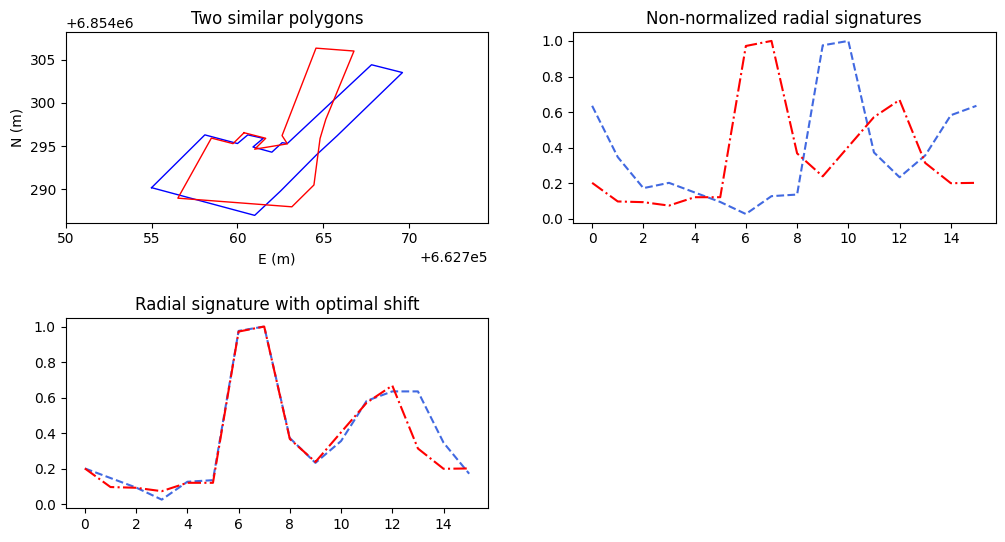

In [3]:
import math
TRACES = tkl.TrackReader.readFromWkt("../../../data/wkt/twobatis.wkt", id_geom=0,
                             separator="#", h=1, doublequote=False)

bati1 = TRACES[0]
bati2 = TRACES[1]
C = bati2.getEnclosedPolygon().centroid()
bati2.rotate(math.pi/10, tkl.ENUCoords(C[0], C[1]))

plt.figure(figsize=(12, 4))
plt.subplots_adjust(top=1.3, wspace=0.2, hspace=0.5)

# ------------------------------------------------------------
# 
ax1 = plt.subplot2grid((2, 2), (0, 0))

bati1.plot('b-', append=ax1)
bati2.plot('r-', append=ax1)
plt.xlim([bati1.bbox().getXmin()-5, bati1.bbox().getXmax()+5])
plt.title('Two similar polygons')

# ------------------------------------------------------------
ax2 = plt.subplot2grid((2, 2), (0, 1))

sign1 = tkl.computeRadialSignature(bati1)
R1 = sign1.getAnalyticalFeature('r')
plt.plot(R1, color="royalblue", linestyle='--')

sign2 = tkl.computeRadialSignature(bati2)
R2 = sign2.getAnalyticalFeature('r')
plt.plot(R2, color="red", linestyle='-.')

plt.title('Non-normalized radial signatures')

# ------------------------------------------------------------
ax3 = plt.subplot2grid((2, 2), (1, 0))

# radial distance unilateral
sign1.op('r1 = r >> 54')
sign1.createAnalyticalFeature("r2", sign2["r"])
sign1.op(tkl.Operator.CORRELATOR, "r1", "r2", "rho")
dt = sign1.op("ARGMAX(rho)")[0]
sign1.op('r1 = r1 >> ' + str(dt))

R3 = sign1.getAnalyticalFeature('r1')
R4 = sign1.getAnalyticalFeature('r2')
plt.plot(R3, color="royalblue", linestyle='--')
plt.plot(R4, color="red", linestyle='-.')

plt.title('Radial signature with optimal shift')

In [4]:
# ------------------------------------------------------------
T = sign1.op(tkl.Operator.L2, 'r1', 'r2')
print ('Radial distance between two simple building polygons: ', T)

Radial distance between two simple building polygons:  0.0915944791404684


### General Hausdorff distance between two tracks